# Reproduce scaling laws results from Chinchilla paper - https://arxiv.org/pdf/2203.15556

In [26]:
def calculate_gpt_params(vocabulary_size, d_model, num_layers):
    ffw_size = 4*d_model
    attention = 3*d_model**2 + 3*d_model
    attproj = d_model**2 + d_model
    ffw = d_model*(ffw_size) + ffw_size
    ffwproj = ffw_size*d_model + d_model
    layernorms = 2*2*d_model
    ln_f = 2*d_model
    dense = d_model * vocabulary_size
    # embeddings are not included in params count
    return num_layers*(attention + attproj + ffw + ffwproj + layernorms) + ln_f + dense

calculate_gpt_params(vocabulary_size=50257, d_model=768, num_layers = 12) / 1e6

123.653376

In [27]:
def calculate_chinchilla_params(vocabulary_size, d_model, num_layers, ffw_size):
    attention = 3*d_model**2 + 3*d_model
    # chinchilla uses relative position embeddings
    relative_pos = d_model**2 + 2*d_model
    attproj = d_model**2 + d_model
    ffw = d_model*ffw_size + ffw_size
    ffwproj = ffw_size*d_model + d_model
    layernorms = 2*2*d_model
    ln_f = 2*d_model
    dense = d_model*vocabulary_size
    return num_layers*(attention + relative_pos + attproj + ffw + ffwproj + layernorms) + ln_f + dense

In [28]:
import json

# from last page of https://arxiv.org/pdf/2203.15556
chinchilla_models_txt = '[[44000000.0, 512, 2048, 64, 8, 8], [57000000.0, 576, 2304, 64, 9, 9], [74000000.0, 640, 2560, 64, 10, 10], [90000000.0, 640, 2560, 64, 10, 13], [106000000.0, 640, 2560, 64, 10, 16], [117000000.0, 768, 3072, 64, 12, 12], [140000000.0, 768, 3072, 64, 12, 15], [163000000.0, 768, 3072, 64, 12, 18], [175000000.0, 896, 3584, 64, 14, 14], [196000000.0, 896, 3584, 64, 14, 16], [217000000.0, 896, 3584, 64, 14, 18], [251000000.0, 1024, 4096, 64, 16, 16], [278000000.0, 1024, 4096, 64, 16, 18], [306000000.0, 1024, 4096, 64, 16, 20], [425000000.0, 1280, 5120, 128, 10, 18], [489000000.0, 1280, 5120, 128, 10, 21], [509000000.0, 1408, 5632, 128, 11, 18], [552000000.0, 1280, 5120, 128, 10, 24], [587000000.0, 1408, 5632, 128, 11, 21], [632000000.0, 1536, 6144, 128, 12, 19], [664000000.0, 1408, 5632, 128, 11, 24], [724000000.0, 1536, 6144, 128, 12, 22], [816000000.0, 1536, 6144, 128, 12, 25], [893000000.0, 1792, 7168, 128, 14, 20], [1018000000.0, 1792, 7168, 128, 14, 23], [1143000000.0, 1792, 7168, 128, 14, 26], [1266000000.0, 2048, 8192, 128, 16, 22], [1424000000.0, 2176, 8704, 128, 17, 22], [1429000000.0, 2048, 8192, 128, 16, 25], [1593000000.0, 2048, 8192, 128, 16, 28], [1609000000.0, 2176, 8704, 128, 17, 25], [1731000000.0, 2304, 9216, 128, 18, 24], [1794000000.0, 2176, 8704, 128, 17, 28], [2007000000.0, 2304, 9216, 128, 18, 28], [2283000000.0, 2304, 9216, 128, 18, 32], [2298000000.0, 2560, 10240, 128, 20, 26], [2639000000.0, 2560, 10240, 128, 20, 30], [2980000000.0, 2560, 10240, 128, 20, 34], [3530000000.0, 2688, 10752, 128, 22, 36], [3802000000.0, 2816, 11264, 128, 22, 36], [4084000000.0, 2944, 11776, 128, 22, 36], [4516000000.0, 3072, 12288, 128, 24, 36], [6796000000.0, 3584, 14336, 128, 28, 40], [9293000000.0, 4096, 16384, 128, 32, 42], [11452000000.0, 4352, 17408, 128, 32, 47], [12295000000.0, 4608, 18432, 128, 36, 44], [12569000000.0, 4608, 18432, 128, 32, 47], [13735000000.0, 4864, 19456, 128, 32, 47], [14940000000.0, 4992, 19968, 128, 32, 49], [16183000000.0, 5120, 20480, 128, 40, 47]]'
chilchilla_models = json.loads(chinchilla_models_txt) # all 50 models
chilchilla_models[0] # tuples of params, d_model, ffw_size, kv_size, n_heads, n_layers from Table A9

[44000000.0, 512, 2048, 64, 8, 8]

In [29]:
for m in chilchilla_models[-5:]: # only last 5 models from paper
    p, d, f, k, _, l = m
    nparams = calculate_chinchilla_params(vocabulary_size = 32000, d_model = d, num_layers = l, ffw_size=f)
    print(f"Estimated params: {nparams/1e6:.4f}M, Chinchilla params: {p/1e6:.4f}M, d_model: {d}, n_layers: {l}")

Estimated params: 12296.1623M, Chinchilla params: 12295.0000M, d_model: 4608, n_layers: 44
Estimated params: 13124.4826M, Chinchilla params: 12569.0000M, d_model: 4608, n_layers: 47
Estimated params: 14614.4279M, Chinchilla params: 13735.0000M, d_model: 4864, n_layers: 47
Estimated params: 16037.5039M, Chinchilla params: 14940.0000M, d_model: 4992, n_layers: 49
Estimated params: 16184.4582M, Chinchilla params: 16183.0000M, d_model: 5120, n_layers: 47


In [30]:
def calculate_chinchilla_flops(context_length, d_model, num_heads, num_layers, ffw_size):
    key_size = d_model // num_heads

    attention = 2 * 3 * context_length * d_model * (key_size * num_heads)
    attlogits = 2 * context_length * context_length * (key_size * num_heads)
    attsoftmax = 3 * num_heads * context_length * context_length
    attvalue = 2 * context_length * context_length * (key_size * num_heads)
    attlinear = 2 * context_length * (key_size * num_heads) * d_model
    att = attention + attlogits + attsoftmax + attvalue + attlinear
    dense = 2 * context_length * (d_model * ffw_size + d_model * ffw_size)
    
    # do not count embeddings and logits to reproduce table 4 from paper:
    forward_flops = num_layers * (att + dense)
    backward_flops = 2 * forward_flops
    return forward_flops + backward_flops

In [31]:
import pandas as pd

# table A4 from paper appendix
chilchilla_models_table4 = [
  [10, 640, 2560, 10, 64],
  [20, 1024, 4096, 16, 64],
  [24, 1280, 5120, 10, 128 ],
  [26, 1792, 7168, 14, 128 ],
  [28, 2048, 8192, 16, 128],
  [40,  3584, 14336, 28, 128]
]

rows = []
for num_layers, d_model, ffw_size, num_heads, _ in chilchilla_models_table4:
    # vocabulary size is 32000 in chinchilla
    vocabulary_size = 32000
    context_length = 2048

    D = context_length
    N = calculate_chinchilla_params(vocabulary_size, d_model, num_layers, ffw_size)
    F = calculate_chinchilla_flops(context_length, d_model, num_heads, num_layers, ffw_size)

    approximate_flops = 6 * D * N
    chinchilla_flops = F * (float(D) / context_length)
    
    rows.append({
      'context_length': context_length,
      'vocabulary_size': 32000,
      'd_model': d_model,
      'num_heads': num_heads,
      'num_layers': num_layers,
      'ffw_size': ffw_size,
      'N': N,
      'F': F,
      'approximate_flops': approximate_flops,
      'chinchilla_flops': chinchilla_flops,
      'ratio': chinchilla_flops / approximate_flops,
    })

df = pd.DataFrame(rows)
df

,context_length,vocabulary_size,d_model,num_heads,num_layers,ffw_size,N,F,approximate_flops,chinchilla_flops,ratio
0,2048,32000,640,10,10,2560,73825280,929877196800,907165040640,9.298772e+11,1.025036
1,2048,32000,1024,16,20,4096,305707008,4135248199680,3756527714304,4.135248e+12,1.100817
2,2048,32000,1280,10,24,5120,552604160,7353453772800,6790399918080,7.353454e+12,1.082919
3,2048,32000,1792,14,26,7168,1143453696,14670316437504,14050759016448,1.467032e+13,1.044094
4,2048,32000,2048,16,28,8192,1593126912,20220437594112,19576343494656,2.022044e+13,1.032902
5,2048,32000,3584,28,40,14336,6796274688,83021046743040,83512623366144,8.302105e+13,0.994114


# Approach 3 from paper

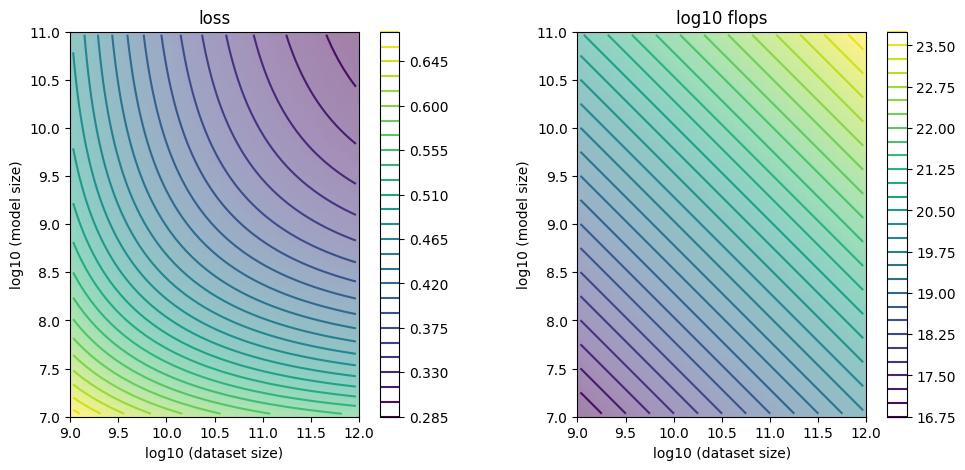

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# approximate loss given parameters and dataset size (tokens)
def L(N, D):
    E = 1.69
    A = 406.4
    B = 410.7
    alpha = 0.34
    beta = 0.28
    return A / (N ** alpha) + B / (D ** beta) + E

ns = 10 ** np.arange(7, 11, step=2**-4) # from 10M to 100B
ds = 10 ** np.arange(9, 12, step=2**-4) # from 1B to 1T
plt.figure(figsize=(12, 5))
plt.subplot(121)

loss2d = np.log10(np.array([[L(n, d) for d in ds] for n in ns]))
plt.imshow(loss2d, extent=[9, 12, 7, 11], origin='lower', alpha=0.5)
plt.contour(loss2d, levels=30, extent=[9, 12, 7, 11], origin='lower')
plt.xlabel('log10 (dataset size)')
plt.ylabel('log10 (model size)')
plt.title('loss')
plt.colorbar()

plt.subplot(122)
compute2d = np.log10(np.array([[6*n*d for d in ds] for n in ns]))
plt.imshow(compute2d, extent=[9, 12, 7, 11], origin='lower', alpha=0.5)
plt.contour(compute2d, levels=30, extent=[9, 12, 7, 11], origin='lower')
plt.xlabel('log10 (dataset size)')
plt.ylabel('log10 (model size)')
plt.title('log10 flops')
plt.colorbar()

best model size: 316.23M
best dataset size: 11.65B


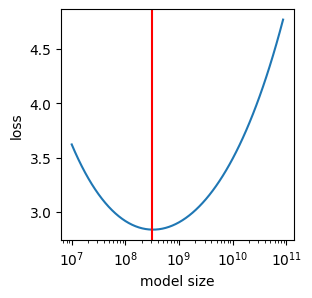

In [60]:
c = 2.21e19 # from table A3 (compute)

def plot_optimal_model_dataset_size(c, ns = 10 ** np.arange(7, 11, step=2**-4)): # default sizes from 10M to 100B
    ds = c / (6 * ns)
    losses = L(ns, ds)
    best = np.argmin(losses)
    print(f"best model size: {ns[best]/1e6:.2f}M")
    print(f"best dataset size: {ds[best]/1e9:.2f}B")
    plt.figure(figsize=(3,3))
    plt.plot(ns, losses)
    plt.xscale('log')
    plt.axvline(ns[best], color='red')
    plt.xlabel('model size')
    plt.ylabel('loss')
    
plot_optimal_model_dataset_size(c)

best model size: 205352.50M
best dataset size: 24348.38B


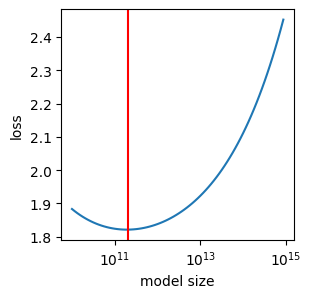

In [61]:
c = 3e25 # some estimate for gpt4 compute

plot_optimal_model_dataset_size(c, 10 ** np.arange(10, 15, step=2**-4))

best model size: 6493816315.76M
best dataset size: 7699632630.30B


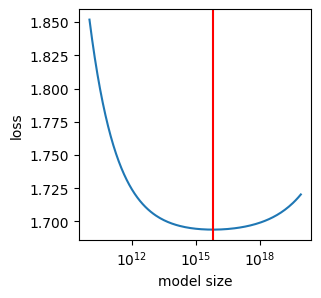

In [62]:
c = 3e35 # 3e35 approaches 1.69 loss

plot_optimal_model_dataset_size(c, 10 ** np.arange(10, 20, step=2**-4))

In [65]:
# Calculate the Chinchilla optimal models for a range of compute budgets

# from 1e17 to 1e26
cs = 10 ** np.arange(17, 26, step=2**-8)
models = []
for c in cs:
    ns = 10 ** np.arange(7, 14, step=2**-8)
    ds = c / (6 * ns)
    losses = L(ns, ds)
    best = np.argmin(losses)
    models.append((c, ns[best], ds[best]))

len(models)

2304

In [66]:
# closest chinchilla optimal model

query_model_size = 400e6
ns = np.array([n for c, n, d in models])
ds = np.array([d for c, n, d in models])
ix = np.argmin(np.abs(ns - query_model_size))
print(f"model size: {ns[ix]/1e6:.2f}M")
print(f"dataset size: {ds[ix]/1e9:.2f}B")
print(f"flops: {6*ns[ix]*ds[ix]:e}")
print(f"loss: {L(ns[ix], ds[ix]):.2f}")

model size: 399.54M
dataset size: 14.43B
flops: 3.459892e+19
loss: 2.76


# Approach 2 from Chinchilla paper

In [70]:
# parameters, tokens
raw = [
    [400e6, 7.7e9],
    [1e9, 20.0e9],
    [10e9, 219.5e9],
    [67e9, 1.7e12],
    [175e9, 4.3e12],
    [280e9, 7.1e12],
    [520e9, 13.4e12],
    [1e12, 26.5e12],
    [10e12, 292.0e12],
]

import numpy as np
x = np.array([np.log10(x[0]) for x in raw])
y = np.array([np.log10(x[1]) for x in raw])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(f"y = {m}x + {c}")

y = 1.0409573169995876x + 0.9353887152390992


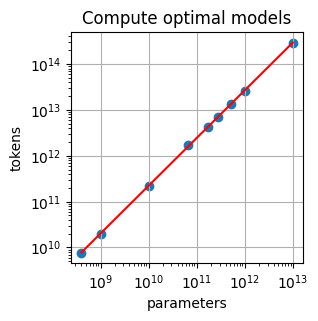

In [71]:
plt.figure(figsize=(3, 3))
# plot the line
plt.plot([q[0] for q in raw], [10**(m*np.log10(q[0]) + c) for q in raw], label='linear regression', color='r')
# plot the raw data
plt.scatter([q[0] for q in raw], [q[1] for q in raw], label='raw data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('parameters')
plt.ylabel('tokens')
plt.title('Compute optimal models')
plt.grid()

In [72]:
xquery = 124e6 # gpt-2 small has 124M params
yquery = 10**(m*np.log10(xquery) + c)
print(f"Predicted parameters for {xquery:e} tokens: {yquery:e}")

Predicted parameters for 1.240000e+08 tokens: 2.292426e+09
